Los datos crudos son un csv con columnas:
    Liste cheat white: En orden de los movimientos de blancas, 0 si es normal, 1 si el movimento es el mejor.
    Liste cheat black: Lo mismo para negras.
    Game: La partida de ajedrez en formato PGN.
    Elo white: "Rating" del jugador de blancas, -1 si es menor que 1000 o mayor que 2000.
    Elo black: Lo mismo para negras.
    Score: Resultado de la partida. 

In [2]:
import pandas as pd
games = pd.read_csv('games.csv')
games.head()


,Liste cheat white,Liste cheat black,Game,Elo White,Elo Black,Score
0,00000000001111101010111010100110000001001111,0000000000111001000000001100100000000111000,1. d4 e6 2. c4 d5 3. Nc3 Be7 4. Nf3 Nf6 5. Bf4...,1001,-1,1/2-1/2
1,0000000000000010111101100000100111000111101111001,0000000000110111110111111111111111111011111111111,1. d4 c5 2. c4 cxd4 3. Qxd4 Nc6 4. Qd1 e6 5. N...,1001,-1,1/2-1/2
2,0000000000111001110111100111111110101011110111...,0000000000111111100001111111111111111111010101...,1. e4 e5 2. d4 exd4 3. Qxd4 Nc6 4. Qd3 b6 5. B...,1001,-1,1/2-1/2
3,000000000011111101111111110110101111111,00000000000001101001000011100111100110,1. e4 e5 2. Nf3 Nf6 3. Nc3 Bc5 4. Bc4 d6 5. O-...,1002,-1,1/2-1/2
4,0000000000001000111010111101001010011010011011...,0000000000000000010000001110011010100010001100...,1. d4 d5 2. c4 Nf6 3. Nc3 e6 4. Bg5 Be7 5. e3 ...,1002,-1,1/2-1/2


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48933 entries, 0 to 48932
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Liste cheat white  48933 non-null  object
 1   Liste cheat black  48933 non-null  object
 2   Game               48932 non-null  object
 3   Elo White          48933 non-null  int64 
 4   Elo Black          48933 non-null  int64 
 5   Score              48933 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


In [4]:
games['N cheat white'] = games['Liste cheat white'].apply(lambda x: x.count('1'))
games['N cheat black'] = games['Liste cheat black'].apply(lambda x: x.count('1'))
games['Total Moves'] = games['Liste cheat white'].str.len() + games['Liste cheat black'].str.len()
games = games.drop_duplicates()
games = games[(games['Elo White'] != -1) & (games['Elo Black'] != -1)]
games = games[games['Game'].apply(lambda x: isinstance(x, str))]
games = games.dropna()

games.head()

,Liste cheat white,Liste cheat black,Game,Elo White,Elo Black,Score,N cheat white,N cheat black,Total Moves
210,0000000000001110011101111111111101101110111111,000000000001011101010000000101100000010001100,1. d4 d5 2. c4 Nf6 3. Nc3 c6 4. Bg5 Qd6 5. c5 ...,1201,1301,1/2-1/2,28,12,91
211,000000000000000101,00000000000100010,1. e4 e5 2. Bc4 Nf6 3. d3 Bc5 4. Nc3 c6 5. f4 ...,1217,1301,1/2-1/2,2,2,35
212,00000000000111110110010011101010111011101111011,0000000000000000000000001000000000000000000000,1. e4 e5 2. Nf3 Nf6 3. Nxe5 Qe7 4. Nf3 Nxe4 5....,1228,1301,1/2-1/2,25,1,93
213,0000000000011101010100000010011001011001110000...,0000000000111101111111001110110111111111111001...,1. a3 e5 2. h3 Nc6 3. Nc3 Nf6 4. Nf3 d5 5. d3 ...,1246,1301,1/2-1/2,16,37,110
214,000000000000000000000000000,00000000001010100100001100,1. e4 e5 2. Nc3 Bc5 3. Nf3 Qf6 4. Nd5 Qd8 5. B...,1247,1301,1/2-1/2,0,6,53


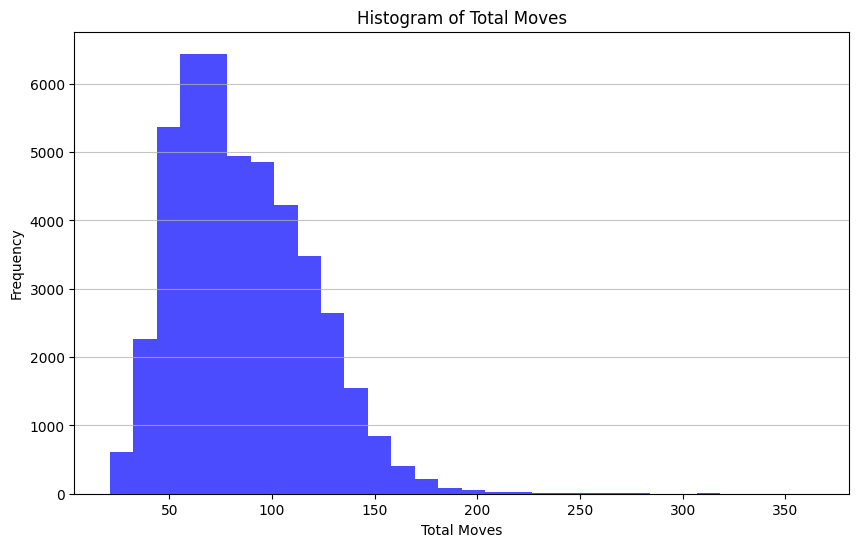

In [5]:
import matplotlib.pyplot as plt

# Plot histogram of Total Moves
plt.figure(figsize=(10, 6))
plt.hist(games['Total Moves'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Total Moves')
plt.xlabel('Total Moves')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

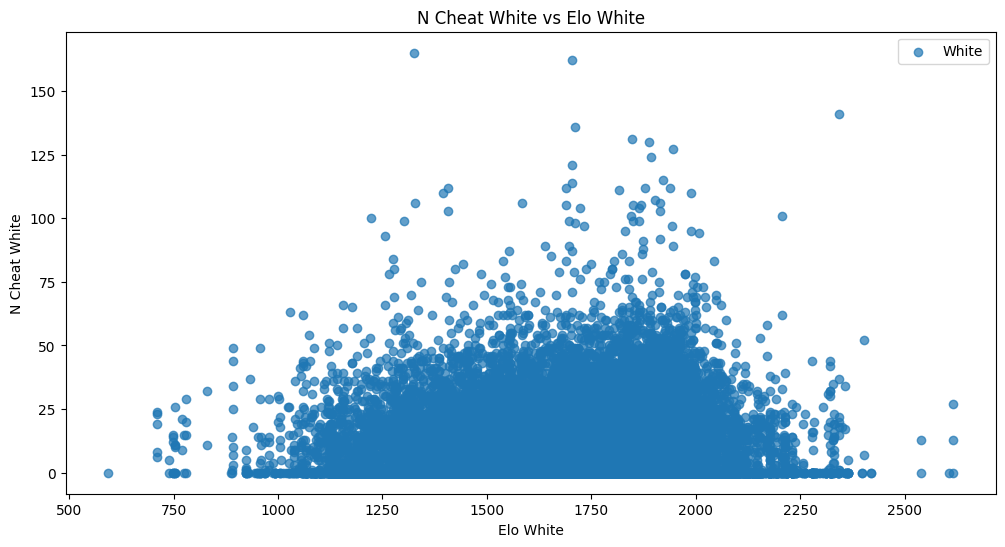

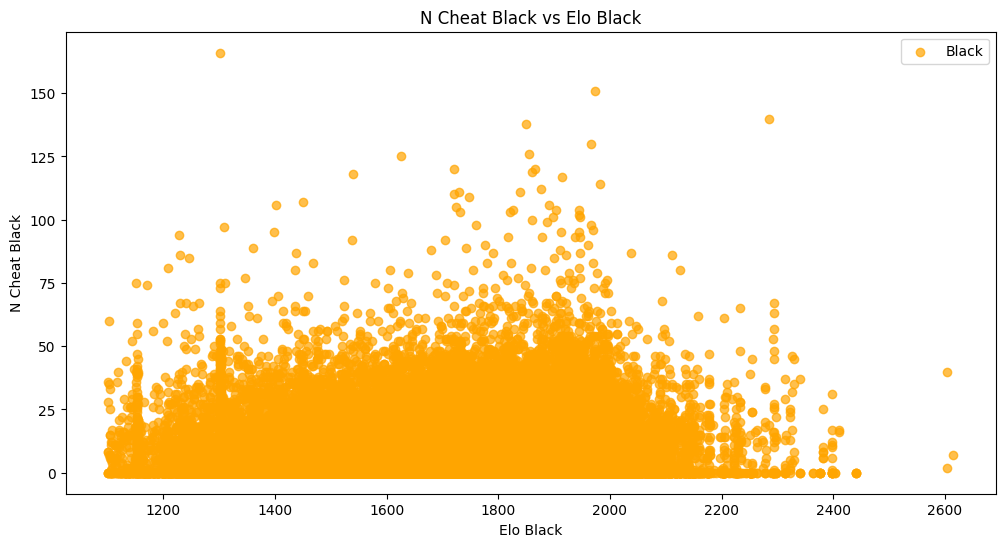

In [6]:
import matplotlib.pyplot as plt

# Plot for N cheat white vs Elo White
plt.figure(figsize=(12, 6))
plt.scatter(games['Elo White'], games['N cheat white'], alpha=0.7, label='White')
plt.title('N Cheat White vs Elo White')
plt.xlabel('Elo White')
plt.ylabel('N Cheat White')
plt.legend()
plt.show()

# Plot for N cheat black vs Elo Black
plt.figure(figsize=(12, 6))
plt.scatter(games['Elo Black'], games['N cheat black'], alpha=0.7, color='orange', label='Black')
plt.title('N Cheat Black vs Elo Black')
plt.xlabel('Elo Black')
plt.ylabel('N Cheat Black')
plt.legend()
plt.show()

In [7]:
count_black_0_white_gt_0 = len(games[(games['N cheat black'] == 0) & (games['N cheat white'] > 0)])
count_black_gt_0_white_0 = len(games[(games['N cheat black'] > 0) & (games['N cheat white'] == 0)])
count_black_gt_0_white_gt_0 = len(games[(games['N cheat black'] > 0) & (games['N cheat white'] > 0)])
count_black_0_white_0 = len(games[(games['N cheat black'] == 0) & (games['N cheat white'] == 0)])

print("N cheat black = 0 y N cheat white > 0:", count_black_0_white_gt_0)
print("N cheat black > 0 y N cheat white = 0:", count_black_gt_0_white_0)
print("N cheat black > 0 y N cheat white > 0:", count_black_gt_0_white_gt_0)
print("N cheat black = 0 y N cheat white = 0:", count_black_0_white_0)


subset_black_0_white_0 = games[(games['N cheat black'] == 0) & (games['N cheat white'] == 0)]

subset_black_0_white_gt_0 = games[(games['N cheat black'] == 0) & (games['N cheat white'] > 0)].sample(n=3500, random_state=42)

subset_black_gt_0_white_0 = games[(games['N cheat black'] > 0) & (games['N cheat white'] == 0)].sample(n=3500, random_state=42)

# Combinar los subconjuntos
games = pd.concat([subset_black_0_white_0, subset_black_0_white_gt_0, subset_black_gt_0_white_0])

# Mostrar el resultado
print(games.info())

N cheat black = 0 y N cheat white > 0: 13396
N cheat black > 0 y N cheat white = 0: 17330
N cheat black > 0 y N cheat white > 0: 6164
N cheat black = 0 y N cheat white = 0: 7673
<class 'pandas.core.frame.DataFrame'>
Index: 14673 entries, 1095 to 38613
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Liste cheat white  14673 non-null  object
 1   Liste cheat black  14673 non-null  object
 2   Game               14673 non-null  object
 3   Elo White          14673 non-null  int64 
 4   Elo Black          14673 non-null  int64 
 5   Score              14673 non-null  object
 6   N cheat white      14673 non-null  int64 
 7   N cheat black      14673 non-null  int64 
 8   Total Moves        14673 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.1+ MB
None


In [56]:
import pandas as pd
from stockfish import Stockfish
import chess.pgn
import io
from tqdm import tqdm  # Importamos tqdm

# Ruta a tu binario de Stockfish
STOCKFISH_PATH = "stockfish/stockfish-windows-x86-64-avx2.exe"

# Configurar el motor de Stockfish
stockfish = Stockfish(path=STOCKFISH_PATH, depth=10)


def evaluar_pgn(pgn_str):
    """Evalúa la partida PGN y devuelve una lista de evaluaciones en cada movimiento."""
    # Leer la partida desde el string PGN
    game = chess.pgn.read_game(io.StringIO(pgn_str))
    
    evaluations = []
    board = game.board()  # Inicializamos el tablero antes de los movimientos

    # Iterar sobre cada movimiento de la partida
    for move in game.mainline_moves():
        # Aplicar el movimiento al tablero
        board.push(move)
        
        # Pasar la posición al motor
        stockfish.set_fen_position(board.fen())
        
        # Obtener la evaluación
        info = stockfish.get_evaluation()
        
        if info["type"] == "mate":
            if info["value"] > 0:
                evaluations.append(f"W-{info['value']}")  # Positive value means mate for White
            else:
                evaluations.append(f"B-{-info['value']}")  # Negative value means mate for Black
        elif info["type"] == "cp":
            evaluations.append(info["value"] / 100.0)  # Convertir centipawns a pawns
        else:
            evaluations.append(None)  # Si no se puede evaluar, devolver None

    return evaluations


def evaluar_partidas_en_dataframe(df):
    """Añade la columna 'Eval' al DataFrame con una lista de evaluaciones para cada partida."""
    tqdm.pandas()  # Inicializamos tqdm para DataFrame

    # Dividir el DataFrame en bloques del 10%
    num_chunks = 10
    chunk_size = len(df) // num_chunks
    for i in range(num_chunks):
        # Procesar cada bloque de 10%
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size if i < num_chunks - 1 else len(df)

        # Sub-DataFrame con un bloque
        df_chunk = df.iloc[start_idx:end_idx]

        # Evaluar las partidas en este bloque
        df_chunk['Eval'] = df_chunk['Game'].progress_apply(evaluar_pgn)

        # Guardar el bloque procesado
        df_chunk.to_csv(f"Games_Prep_{i+1}.csv", index=False)

    return df


# Evaluar las partidas con progreso y guardar el archivo en bloques
games = evaluar_partidas_en_dataframe(games)

# Imprimir una muestra final
print(games.head())


100%|██████████| 1467/1467 [23:03<00:00,  1.06it/s]
C:\Users\yoyom\AppData\Local\Temp\ipykernel_11416\814489154.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunk['Eval'] = df_chunk['Game'].progress_apply(evaluar_pgn)
100%|██████████| 1467/1467 [23:35<00:00,  1.04it/s]
C:\Users\yoyom\AppData\Local\Temp\ipykernel_11416\814489154.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunk['Eval'] = df_chunk['Game'].progress_apply(evaluar_pgn)
100%|██████████| 1467/1467 [24:35<00:00,  1.01s/it]
C:

                                 Liste cheat white  \
1095                           0000000000000000000   
1251                    00000000000000000000000000   
1477                        0000000000000000000000   
1911                        0000000000000000000000   
1917  00000000000000000000000000000000000000000000   

                                Liste cheat black  \
1095                           000000000000000000   
1251                   00000000000000000000000000   
1477                       0000000000000000000000   
1911                       0000000000000000000000   
1917  0000000000000000000000000000000000000000000   

                                                   Game  Elo White  Elo Black  \
1095  1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Qc7 5. ...       1988       2142   
1251  1. e4 e5 2. Bc4 d6 3. Qf3 f6 4. d3 Nc6 5. Bxg8...       1472       1450   
1477  1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Nc6 5. Bb5 Qb...       1492       1528   
1911  1. f3 e5 2. Kf2 Bc5+ 3. Kg


C:\Users\yoyom\AppData\Local\Temp\ipykernel_11416\814489154.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunk['Eval'] = df_chunk['Game'].progress_apply(evaluar_pgn)


In [8]:
import ast

games = pd.read_csv('Games_Prep_1.csv', dtype={"Liste cheat white": str, "Liste cheat black": str})

for i in range(2, 11):
    chunk = pd.read_csv(f"Games_Prep_{i}.csv", dtype={"Liste cheat white": str, "Liste cheat black": str})
    games = pd.concat([games, chunk], ignore_index=True)

games.to_csv('Games_Prep.csv', index=False)
    

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14673 entries, 0 to 14672
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Liste cheat white  14673 non-null  object
 1   Liste cheat black  14673 non-null  object
 2   Game               14673 non-null  object
 3   Elo White          14673 non-null  int64 
 4   Elo Black          14673 non-null  int64 
 5   Score              14673 non-null  object
 6   N cheat white      14673 non-null  int64 
 7   N cheat black      14673 non-null  int64 
 8   Total Moves        14673 non-null  int64 
 9   Eval               14673 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.1+ MB


In [82]:


def dividir_partidas(games):
    rows = []

    for _, row in games.iterrows():
        evals = ast.literal_eval(row['Eval'])[:-2]
        
        for i in range(len(evals)):
            if isinstance(evals[i], str) and evals[i].startswith('W-'):
                evals[i] = +15.0
            elif isinstance(evals[i], str) and evals[i].startswith('B-'):
                evals[i] = -15.0
            else:
                evals[i] = max(-15.0, min(15.0, float(evals[i])))  # Limitar a [-15, 15]
                
        evals = [0.52] + evals  # Añadir la evaluación inicial de 0.52 al principio
        diff_evals = [evals[i] - evals[i-1] for i in range(1, len(evals))]
        

        white_diff = diff_evals[::2]
        black_diff = diff_evals[1::2]
        black_diff = [-black_diff[i] for i in range(len(black_diff))]
        
        

        rows.append({
            'evals': white_diff,
            'cheating_pos': [int(row['Liste cheat white'][i]) for i in range(len(white_diff))],
            'cheating': row['Liste cheat white'].count('1') > 0,
            'cheating_magnitude': row['Liste cheat white'].count('1') / len(row['Liste cheat white'])
        })

        rows.append({
            'evals': black_diff,
            'cheating_pos':  [int(row['Liste cheat black'][i]) for i in range(len(black_diff))],
            'cheating': row['Liste cheat black'].count('1') > 0,
            'cheating_magnitude':  row['Liste cheat black'].count('1')  / len(row['Liste cheat black'])
        })

    return pd.DataFrame(rows)

# Crear el nuevo DataFrame
games_split = dividir_partidas(games)

# Opcional: guardar el nuevo DataFrame
games_split.to_csv("Games_Split.csv", index=False)

# Mostrar muestra
print(games_split.head())


                                               evals  \
0  [0.0, -0.04999999999999999, -0.13, -0.03000000...   
1  [0.09000000000000002, 0.04999999999999999, -0....   
2  [0.0, -0.42000000000000004, -0.64, -0.44000000...   
3  [0.010000000000000009, -0.36, -1.23, -0.150000...   
4  [0.0, -0.14999999999999997, -0.309999999999999...   

                                        cheating_pos  cheating  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   

   cheating_magnitude  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  


In [11]:
def intercalar_binarios(s1, s2):
    resultado = []
    max_len = max(len(s1), len(s2))
    
    for i in range(max_len):
        if i < len(s1):
            resultado.append(int(s1[i]))
        if i < len(s2):
            resultado.append(int(s2[i]))
    
    return resultado

In [12]:


def dividir_partidas(games):
    rows = []

    for _, row in games.iterrows():
        evals = ast.literal_eval(row['Eval'])[:-2]
        
        for i in range(len(evals)):
            if isinstance(evals[i], str) and evals[i].startswith('W-'):
                evals[i] = +15.0
            elif isinstance(evals[i], str) and evals[i].startswith('B-'):
                evals[i] = -15.0
            else:
                evals[i] = max(-15.0, min(15.0, float(evals[i])))  # Limitar a [-15, 15]
                
        if  row['Liste cheat white'].count('1') > 0:
            side_cheating = "white"
            cheating_magnitude = row['Liste cheat white'].count('1') / (len(row['Liste cheat white'])-10)

        elif row['Liste cheat black'].count('1') > 0:
            side_cheating = "black"
            cheating_magnitude = row['Liste cheat black'].count('1') / (len(row['Liste cheat black'])-10)
            evals = [-x for x in evals]
        else:
            side_cheating = "none"
            cheating_magnitude = 0.0
       
        combined_cheating_pos = intercalar_binarios(row['Liste cheat white'], row['Liste cheat black'])
        
        

        rows.append({
            'evals': evals,
            'cheating_pos':combined_cheating_pos,
            'cheating': cheating_magnitude > 0,
            'cheating_magnitude': cheating_magnitude
        })



    return pd.DataFrame(rows)

# Crear el nuevo DataFrame
games_split = dividir_partidas(games)

# Opcional: guardar el nuevo DataFrame
games_split.to_csv("Games_Final.csv", index=False)

# Mostrar muestra
print(games_split.head())

                                               evals  \
0  [0.52, 0.43, 0.38, 0.33, 0.2, 0.38, 0.35, 0.72...   
1  [0.52, 0.51, 0.09, 0.45, -0.19, 1.04, 0.6, 0.7...   
2  [0.52, 0.6, 0.45, 0.47, 0.16, 0.43, 0.32, 0.2,...   
3  [-0.7, -0.81, -1.71, -2.14, -6.79, -7.26, -7.5...   
4  [0.52, 0.6, 0.45, 0.84, 0.48, 0.54, -0.02, 0.2...   

                                        cheating_pos  cheating  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   

   cheating_magnitude  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
